<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/deepfakes/face_makeup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zllrunning/face-makeup.PyTorch

Cloning into 'face-makeup.PyTorch'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), done.


In [2]:
%cd face-makeup.PyTorch

/content/face-makeup.PyTorch


In [3]:
import cv2
import os
import numpy as np
from skimage.filters import gaussian
from test import evaluate
import argparse

In [4]:
def sharpen(img):
  img = img * 1.0
  gauss_out = gaussian(img, sigma=5, multichannel=True)

  alpha = 1.5
  img_out = (img - gauss_out) * alpha + img

  img_out = img_out / 255.0

  mask_1 = img_out < 0
  mask_2 = img_out > 1

  img_out = img_out * (1 - mask_1)
  img_out = img_out * (1 - mask_2) + mask_2
  img_out = np.clip(img_out, 0, 1)
  img_out = img_out * 255
  return np.array(img_out, dtype=np.uint8)

In [9]:
def hair(image, parsing, part=17, color=[230, 50, 20]):
  b, g, r = color
  tar_color = np.zeros_like(image)
  tar_color[:, :, 0] = b
  tar_color[:, :, 1] = g
  tar_color[:, :, 2] = r

  image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  tar_hsv = cv2.cvtColor(tar_color, cv2.COLOR_BGR2HSV)

  if part == 12 or part == 13:
    image_hsv[:, :, 0:2] = tar_hsv[:, :, 0:2]
  else:
    image_hsv[:, :, 0:1] = tar_hsv[:, :, 0:1]

  changed = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

  if part == 17:
    changed = sharpen(changed)

  changed[parsing != part] = image[parsing != part]
  return changed

In [6]:
table = {
    'hair': 17,
    'upper_lip': 12,
    'lower_lip': 13
}

In [18]:
# cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# As a substitution, consider using from google.colab.patches import cv2_imshow

from google.colab.patches import cv2_imshow

image_path = 'adam.png'
cp = 'cp/79999_iter.pth'

image = cv2.imread(image_path)
ori = image.copy()
parsing = evaluate(image_path, cp)
parsing = cv2.resize(parsing, image.shape[0:2], interpolation=cv2.INTER_NEAREST)

parts = [table['hair'], table['upper_lip'], table['lower_lip']]

colors = [[230, 50, 20], [20, 70, 180], [20, 70, 180]]

for part, color in zip(parts, colors):
  image = hair(image, parsing, part, color)


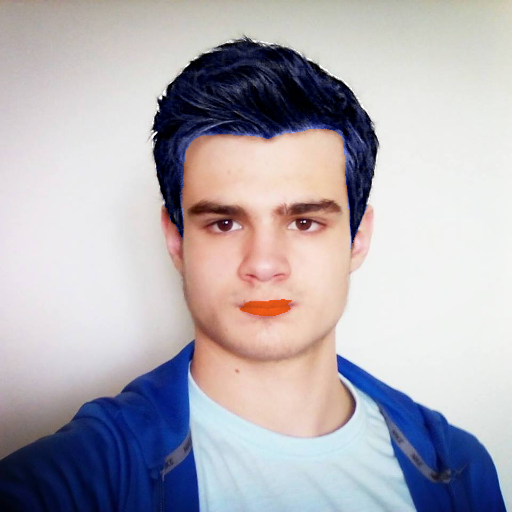

In [19]:
result_img = cv2.resize(image, (512, 512))
cv2_imshow(result_img)